<a href="https://colab.research.google.com/github/wel51x/DS-Unit-4-Sprint-2-NLP/blob/master/My_LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [77]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4.1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [78]:
%%time
##### Your Code Here #####
import requests
from bs4 import BeautifulSoup

home_url = "https://www.indeed.com/jobs?" + "q=Data+Scientist"
items = []
for i in range(10):
  url = home_url + '&start=' + str(i * 10)
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')
  items.extend([summary.text for summary in soup.findAll(class_='summary')])
listings = list(set(items))
print(len(listings), "Data Scientist jobs")

120 Data Scientist jobs
CPU times: user 1.42 s, sys: 43.1 ms, total: 1.46 s
Wall time: 4.84 s


In [0]:
listings

## 2) Use NLTK to tokenize / clean the listings 

In [0]:
##### Your Code Here #####
stop_words = stopwords.words('english')

punctuation = str.maketrans('', '', string.punctuation)
jobs = [listing.translate(punctuation) for listing in listings]

tokens = [word_tokenize(job) for job in jobs]

In [0]:
tokens

In [0]:
tokenz = []
for job in jobs:
  tokenz += word_tokenize(job)
lowercase_tokenz = [w.lower() for w in tokenz]
alphabetic_tokenz = [w for w in lowercase_tokenz if w.isalpha()]
words = [w for w in alphabetic_tokenz if not w in stop_words]

In [0]:
tokenz

In [81]:
(len(tokens), len(words))

(120, 1901)

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [82]:
text = lemmatized_job_listings
# Instantiate vectorizer object
vectorizer = CountVectorizer()
# Create a vocabulary and get word counts per document
bag_of_words = vectorizer.fit_transform(listings)
# Print word counts
print(bag_of_words.toarray())

# Get feature names to use as dataframe column headers
feature_names = vectorizer.get_feature_names()

df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
df.sample(11)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,ability,about,access,accuracy,accurate,achieve,acoustics,acquire,across,actionable,...,working,works,world,would,wrangling,years,yield,you,your,yrs
63,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

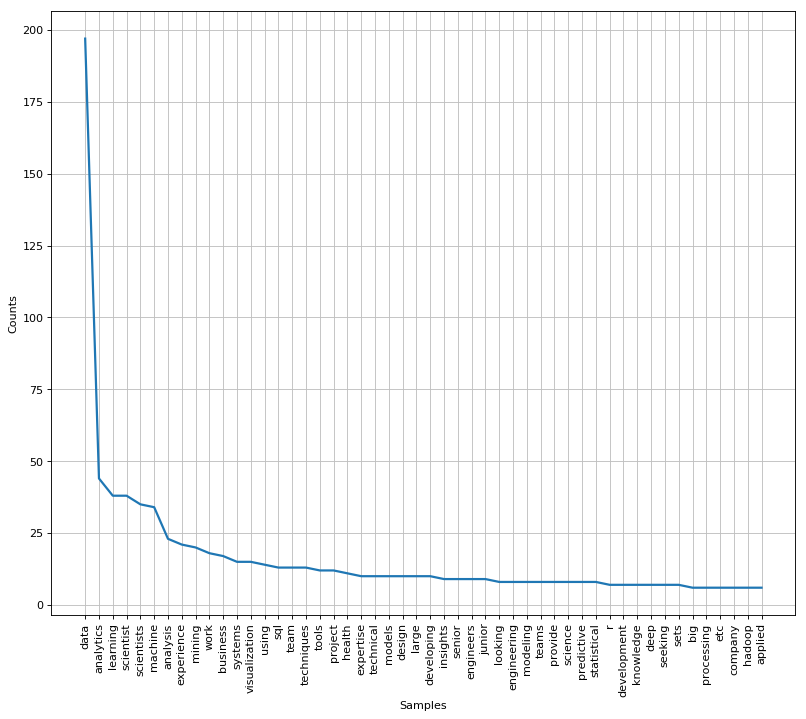

In [83]:
##### Your Code Here #####
fdist = FreqDist(words)

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
fdist.plot(50,cumulative=False)
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [84]:
##### Your Code Here #####
# Instantiate vectorizer object
tfidf = TfidfVectorizer(max_features = 30)
# Create a vocabulary and get word counts per document
feature_matrix = tfidf.fit_transform(listings)
# Get feature names to use as dataframe column headers
feature_names = tfidf.get_feature_names()

# View Feature Matrix as DataFrame
df = pd.DataFrame(feature_matrix.toarray(), columns=feature_names)
df.sample(11)

,analysis,analytics,and,business,data,experience,for,from,in,is,...,systems,team,techniques,the,to,using,visualization,will,with,work
106,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.281055,0.000000,0.000000,0.000000,...,0.000000,0.354893,0.000000,0.242634,0.382567,0.0,0.0,0.0,0.000000,0.000000
99,0.000000,0.000000,0.468819,0.0,0.215547,0.000000,0.000000,0.587762,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
22,0.000000,0.683917,0.187955,0.0,0.172831,0.000000,0.000000,0.000000,0.337659,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.321577,0.000000
105,0.000000,0.000000,0.274574,0.0,0.631199,0.000000,0.000000,0.344236,0.000000,0.000000,...,0.344236,0.000000,0.351927,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
97,0.000000,0.000000,0.333141,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.676311,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
56,0.299708,0.000000,0.000000,0.0,0.255140,0.327323,0.281643,0.000000,0.249233,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.191684,0.0,0.0,0.0,0.237363,0.654646
49,0.366521,0.000000,0.339323,0.0,0.312018,0.400293,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
77,0.000000,0.000000,0.280102,0.0,0.128781,0.660862,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.239617,0.000000
115,0.000000,0.000000,0.381722,0.0,0.351006,0.000000,0.000000,0.000000,0.342879,0.000000,...,0.000000,0.000000,0.489261,0.334500,0.000000,0.0,0.0,0.0,0.000000,0.000000
119,0.404652,0.000000,0.000000,0.0,0.344479,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.320478,0.000000


## Stretch Goals

 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.